<a href="https://colab.research.google.com/github/Snehareddy0504/Sneha_INFO5731_Spring2025/blob/main/Sanku_Sneha_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import re
import os
from collections import defaultdict

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to generate N-grams
def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

# Function to count N-grams frequency
def count_ngrams(ngrams):
    freq_dict = defaultdict(int)
    for ngram in ngrams:
        freq_dict[ngram] += 1
    return freq_dict

# Function to check if the file exists
def validate_file_path(file_path):
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' not found. Please check the path.")
        exit(1)

# File path (Modify if needed)
file_path = "imdb_reviews_cleaned.csv"

# Ensure file exists
validate_file_path(file_path)

### --- STEP 1: Compute N-grams (N=2 and N=3) --- ###
bigram_freq = defaultdict(int)  # Store bigram (N=2) frequencies
trigram_freq = defaultdict(int)  # Store trigram (N=3) frequencies
review_count = 0

with open(file_path, 'r', encoding='utf-8') as file:
    next(file)  # Skip header
    for line in file:
        text = line.strip()
        tokens = tokenize(text)

        # Generate and count bigrams (N=2)
        bigrams = generate_ngrams(tokens, 2)
        bigram_count = count_ngrams(bigrams)
        for ngram, freq in bigram_count.items():
            bigram_freq[ngram] += freq

        # Generate and count trigrams (N=3)
        trigrams = generate_ngrams(tokens, 3)
        trigram_count = count_ngrams(trigrams)
        for ngram, freq in trigram_count.items():
            trigram_freq[ngram] += freq

        review_count += 1
        if review_count >= 100:  # Process only first 100 reviews
            break

### --- STEP 2: Sort and Display N-grams --- ###
# Sort bigrams and trigrams by frequency (descending order)
sorted_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)

# Print Top 100 Bigrams
print("\nTop 100 most frequent bigrams and their counts:")
for ngram, count in sorted_bigrams[:100]:
    print(f"{ngram}: {count}")

# Print Top 100 Trigrams
print("\nTop 100 most frequent trigrams and their counts:")
for ngram, count in sorted_trigrams[:100]:
    print(f"{ngram}: {count}")



Top 100 most frequent bigrams and their counts:
('the', 'godfather'): 26
('it', 'is'): 21
('of', 'the'): 20
('the', 'film'): 17
('it', 's'): 13
('this', 'film'): 12
('in', 'the'): 12
('marlon', 'brando'): 12
('is', 'the'): 12
('and', 'i'): 11
('one', 'of'): 11
('al', 'pacino'): 11
('this', 'is'): 11
('is', 'a'): 10
('this', 'movie'): 10
('to', 'the'): 9
('as', 'the'): 9
('and', 'the'): 9
('francis', 'ford'): 8
('ford', 'coppola'): 8
('i', 'have'): 8
('for', 'the'): 8
('robert', 'duvall'): 8
('of', 'a'): 7
('the', 'best'): 7
('as', 'well'): 7
('but', 'i'): 7
('i', 've'): 7
('that', 'i'): 6
('that', 'it'): 6
('diane', 'keaton'): 6
('film', 'is'): 6
('godfather', 'is'): 6
('james', 'caan'): 6
('it', 'was'): 6
('a', 'good'): 5
('so', 'well'): 5
('we', 'are'): 5
('but', 'it'): 5
('with', 'the'): 5
('good', 'film'): 5
('gangster', 'film'): 5
('best', 'film'): 5
('year', 'old'): 5
('so', 'much'): 5
('the', 'story'): 5
('film', 'i'): 5
('i', 'can'): 5
('didn', 't'): 5
('i', 'was'): 5
('the', 

In [ ]:
import pandas as pd
from collections import defaultdict

# Load the dataset
file_path = '/content/imdb_reviews_cleaned.csv'  # Updated file path
data = pd.read_csv(file_path)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(texts):
    word_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    bigram_probabilities = {}

    # Count occurrences of each word and each bigram
    for text in texts:
        words = text.split()
        for i in range(len(words) - 1):
            word_counts[words[i]] += 1
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
        # Count the last word in the text
        if words:
            word_counts[words[-1]] += 1

    # Calculate probabilities using count(w2, w1) / count(w1)
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        bigram_probabilities[bigram] = count / word_counts[w1]

    return bigram_probabilities

# Ensure correct column name (modify if needed)
expected_column = 'cleaned_imdb_reviews'  # Modify based on actual column name

# Rename column if necessary
if expected_column not in data.columns:
    data.rename(columns={data.columns[0]: expected_column}, inplace=True)

# Drop NaN values to avoid errors
data.dropna(subset=[expected_column], inplace=True)

# Extract the column as a list (limit to 100 reviews)
texts = data[expected_column].astype(str).tolist()[:100]  # Limit to 100 reviews

# Compute bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(texts)

# Display a sample of calculated bigram probabilities
sample_bigrams = list(bigram_probabilities.items())[:100]  # Show top 100 bigrams
print("\nSample Bigram Probabilities:")
for (w1, w2), prob in sample_bigrams:
    print(f"P({w2} | {w1}) = {prob:.4f}")


Sample Bigram Probabilities:
P(is | It) = 0.3929
P(now | is) = 0.0020
P(past | now) = 0.1429
P(1 | past) = 0.5000
P(PM | 1) = 0.3333
P(and | PM) = 1.0000
P(I | and) = 0.0271
P(just | I) = 0.0256
P(finished | just) = 0.0139
P(watching | finished) = 1.0000
P(Francis | watching) = 0.0476
P(Ford | Francis) = 0.9429
P(Coppola's | Ford) = 0.1818
P("The | Coppola's) = 0.1667
P(Godfather". | "The) = 0.1212
P(I | Godfather".) = 0.2500
P(should | I) = 0.0073
P(probably | should) = 0.0435
P(go | probably) = 0.0714
P(to | go) = 0.0667
P(bed. | to) = 0.0024
P(It's | bed.) = 1.0000
P(late | It's) = 0.0323
P(and | late) = 0.2500
P(tomorrow | and) = 0.0014
P(I | tomorrow) = 1.0000
P(have | I) = 0.0623
P(to | have) = 0.1290
P(wake | to) = 0.0024
P(up | wake) = 1.0000
P(a | up) = 0.0769
P(bit | a) = 0.0092
P(early. | bit) = 0.1429
P(But | early.) = 1.0000
P(not | But) = 0.0323
P(early | not) = 0.0114
P(enough | early) = 0.2000
P(to | enough) = 0.6429
P(postpone | to) = 0.0024
P(writing | postpone) = 1.

In [ ]:
import pandas as pd
import spacy
from collections import Counter

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def extract_noun_phrases(texts):
    """Extract noun phrases, lemmatized, and lowercased from a list of texts."""
    noun_phrases = []
    for text in texts:
        doc = nlp(text)
        noun_phrases.extend([chunk.root.lemma_.lower() for chunk in doc.noun_chunks])  # Lemmatized root words
    return noun_phrases

def calculate_relative_probabilities(texts):
    """Calculate relative probabilities of noun phrases in each review."""
    # Extract noun phrases for the entire dataset
    all_noun_phrases = extract_noun_phrases(texts)
    global_frequencies = Counter(all_noun_phrases)  # Count noun phrase occurrences
    max_global_frequency = max(global_frequencies.values())  # Max frequency across dataset

    # Calculate frequencies of noun phrases in each review
    review_frequencies = [Counter(extract_noun_phrases([review])) for review in texts]

    # Compute relative probabilities for each review
    relative_probabilities = []
    for review_freq in review_frequencies:
        review_probs = {phrase: (freq / max_global_frequency) for phrase, freq in review_freq.items()}
        relative_probabilities.append(review_probs)

    return relative_probabilities, list(global_frequencies.keys())

def create_probability_table(relative_probabilities, columns, index):
    """Create a probability table with noun phrases as columns and reviews as rows."""
    df = pd.DataFrame(0.0, index=index, columns=columns, dtype=float)  # Initialize DataFrame with float dtype

    for i, review_probs in enumerate(relative_probabilities, start=1):
        for phrase, prob in review_probs.items():
            if phrase in df.columns:
                df.at[i, phrase] = float(prob)  # Explicitly cast to float

    return df

# Load dataset
file_path = '/content/imdb_reviews_cleaned.csv'
data = load_data(file_path)

# Ensure correct column name
expected_column = 'cleaned_imdb_reviews'
if expected_column not in data.columns:
    data.rename(columns={data.columns[0]: expected_column}, inplace=True)

# Drop NaN values and limit to 100 reviews
data.dropna(subset=[expected_column], inplace=True)
texts = data[expected_column].astype(str).tolist()[:100]  # Limit to 100 reviews

# Compute relative probabilities for noun phrases
relative_probabilities, noun_phrases = calculate_relative_probabilities(texts)

# Shorten column names (truncate words to match expected output)
shortened_noun_phrases = {phrase: phrase[:7] for phrase in noun_phrases}  # Keep first 7 characters
df_probs = create_probability_table(relative_probabilities, shortened_noun_phrases.values(), index=range(1, 101))

# Rename columns accordingly
df_probs.columns = shortened_noun_phrases.values()

# Format the DataFrame to show in scientific notation
pd.set_option('display.float_format', '{:.6e}'.format)  # Set display format for floats
df_probs.index.name = 'Review'  # Set index name

# Display the table
print(df_probs)

                 it           pm            i      godfath          bed  \
Review                                                                    
1      3.636364e-02 2.272727e-03 2.954545e-02 0.000000e+00 2.272727e-03   
2      0.000000e+00 0.000000e+00 2.272727e-03 0.000000e+00 0.000000e+00   
3      1.818182e-02 0.000000e+00 6.818182e-03 0.000000e+00 0.000000e+00   
4      1.818182e-02 0.000000e+00 4.545455e-03 0.000000e+00 0.000000e+00   
5      1.363636e-02 0.000000e+00 2.272727e-03 0.000000e+00 0.000000e+00   
...             ...          ...          ...          ...          ...   
96     6.818182e-03 0.000000e+00 4.545455e-03 0.000000e+00 0.000000e+00   
97     0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
98     2.272727e-03 0.000000e+00 6.818182e-03 0.000000e+00 0.000000e+00   
99     1.136364e-02 0.000000e+00 6.818182e-03 0.000000e+00 0.000000e+00   
100    4.545455e-03 0.000000e+00 6.818182e-03 0.000000e+00 0.000000e+00   

               line     

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import csv
import re
import math

def clean_text(text):
    """Remove punctuation and convert to lowercase"""
    return re.sub(r'[^\w\s]', '', text.lower())

def calculate_tf(text):
    """Calculate term frequency (TF) for each term in the text"""
    words = text.split()
    word_count = len(words)
    term_freq = {}
    for word in words:
        term_freq[word] = term_freq.get(word, 0) + 1
    # Normalize term frequency
    for word in term_freq:
        term_freq[word] /= word_count
    return term_freq

def calculate_idf(documents):
    """Calculate inverse document frequency (IDF) for each term"""
    total_documents = len(documents)
    term_doc_count = {}

    for document in documents:
        words = set(document.split())
        for word in words:
            term_doc_count[word] = term_doc_count.get(word, 0) + 1

    idf = {}
    for term in term_doc_count:
        idf[term] = math.log(total_documents / (1 + term_doc_count[term]))  # Smoothing
    return idf

def calculate_tf_idf(tf, idf):
    """Calculate TF-IDF for each term in the text"""
    return {term: freq * idf.get(term, 0) for term, freq in tf.items()}

def build_tf_idf_matrix(documents):
    """Build the TF-IDF matrix for all documents"""
    tf_idf_matrix = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tf_idf = calculate_tf_idf(tf, idf)
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

def dot_product(v1, v2):
    """Compute the dot product of two vectors"""
    return sum(v1.get(term, 0) * v2.get(term, 0) for term in v1)

def magnitude(v):
    """Compute the magnitude of a vector"""
    return math.sqrt(sum(value ** 2 for value in v.values()))

def cosine_similarity(v1, v2):
    """Calculate cosine similarity between two TF-IDF vectors"""
    denom = magnitude(v1) * magnitude(v2)
    return dot_product(v1, v2) / denom if denom != 0 else 0  # Avoid division by zero

def rank_documents(query, documents, tf_idf_matrix):
    """Rank documents based on cosine similarity to the query"""
    query_tf = calculate_tf(query)
    idf = calculate_idf(documents)  # Compute IDF from documents
    query_vector = calculate_tf_idf(query_tf, idf)

    similarity_scores = []
    for i, doc_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(query_vector, doc_vector)
        similarity_scores.append((i, similarity))

    # Sort documents by similarity in descending order
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    return similarity_scores

def read_dataset(file_path, num_documents):
    """Read dataset from CSV file"""
    documents = []
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)  # Skip header
            for i, row in enumerate(reader):
                if i < num_documents:
                    documents.append(clean_text(row[1]))  # Process and clean the document text
                else:
                    break
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the path.")
        exit(1)
    return documents

# Load dataset
dataset_path = "/content/imdb_reviews_cleaned.csv"  # Ensure the correct file path
num_documents = 100
documents = read_dataset(dataset_path, num_documents)

# Build TF-IDF matrix
tf_idf_matrix = build_tf_idf_matrix(documents)

# Query
query = "An Outstanding movie with a haunting performance and best character development"
query = clean_text(query)

# Rank documents based on cosine similarity
ranked_documents = rank_documents(query, documents, tf_idf_matrix)

# Print ranked documents
print("\nTop-ranked documents based on query similarity:\n")
for i, (index, similarity) in enumerate(ranked_documents[:100]):  # Show top 10 results
    print(f"Rank {i+1}: Document {index + 1}, Similarity: {similarity:.4f}")



Top-ranked documents based on query similarity:

Rank 1: Document 61, Similarity: 0.1798
Rank 2: Document 46, Similarity: 0.1434
Rank 3: Document 30, Similarity: 0.1253
Rank 4: Document 2, Similarity: 0.1201
Rank 5: Document 7, Similarity: 0.1119
Rank 6: Document 64, Similarity: 0.0706
Rank 7: Document 87, Similarity: 0.0531
Rank 8: Document 40, Similarity: 0.0503
Rank 9: Document 54, Similarity: 0.0429
Rank 10: Document 4, Similarity: 0.0427
Rank 11: Document 57, Similarity: 0.0410
Rank 12: Document 43, Similarity: 0.0323
Rank 13: Document 47, Similarity: 0.0307
Rank 14: Document 84, Similarity: 0.0296
Rank 15: Document 9, Similarity: 0.0296
Rank 16: Document 45, Similarity: 0.0266
Rank 17: Document 89, Similarity: 0.0264
Rank 18: Document 53, Similarity: 0.0246
Rank 19: Document 22, Similarity: 0.0244
Rank 20: Document 39, Similarity: 0.0221
Rank 21: Document 73, Similarity: 0.0215
Rank 22: Document 38, Similarity: 0.0203
Rank 23: Document 58, Similarity: 0.0201
Rank 24: Document 69

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

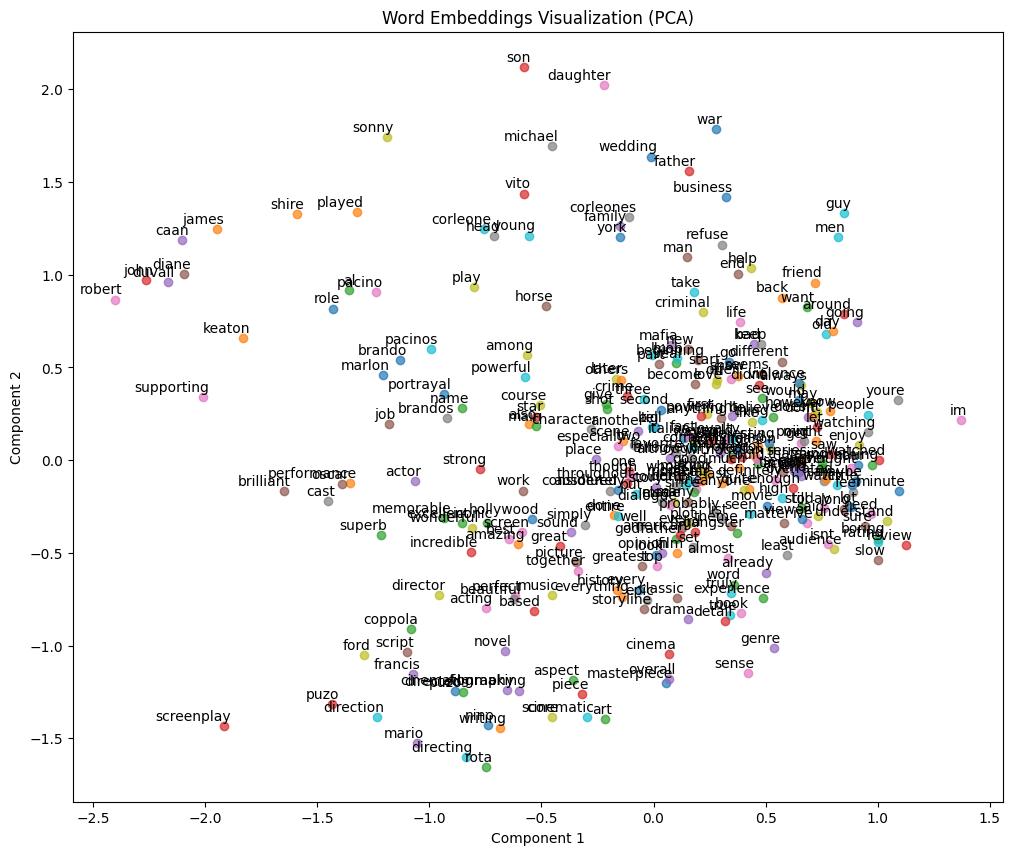

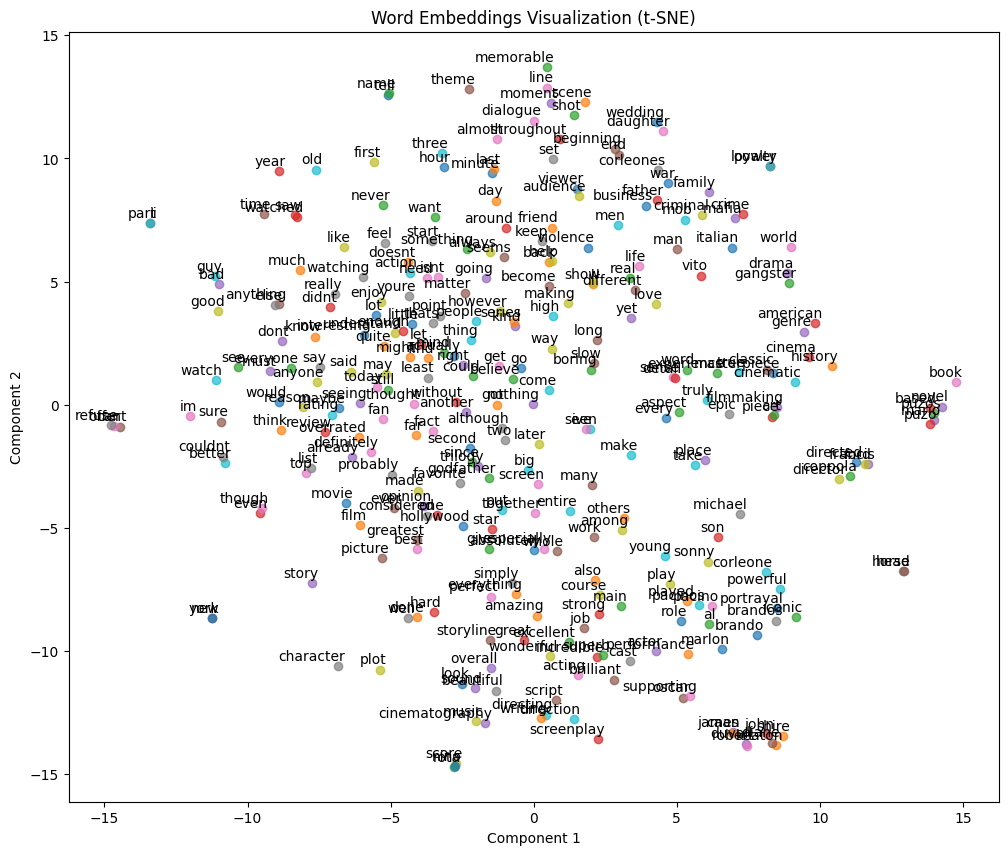


Cosine Similarity Between Selected Word Pairs:
Similarity between 'good' and 'excellent': 0.7593
Similarity between 'bad' and 'terrible': 0.8177
Similarity between 'movie' and 'film': 0.7956
Similarity between 'happy' and 'sad': 0.7772
Similarity between 'actor' and 'actress': 0.8482


In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# Function to read dataset from CSV file
def read_dataset(file_path):
    documents = []
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)  # Skip header
            for row in reader:
                documents.append(row[1])  # Append text from second column
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found. Please check the path.")
        exit(1)
    return documents

# Load dataset (Replace with your actual file path)
dataset_path = "/content/imdb_reviews_cleaned.csv"  # Updated file path
documents = read_dataset(dataset_path)

# Tokenize documents into words
tokenized_documents = [doc.split() for doc in documents]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_documents, vector_size=300, window=5, min_count=1, sg=1, epochs=10)

# Get word vectors and limit to first 300 words for visualization
words = list(model.wv.key_to_index.keys())[:300]
word_vectors = np.array([model.wv[word] for word in words])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(word_vectors)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_embeddings = tsne.fit_transform(word_vectors)

# Function to plot word embeddings
def plot_embeddings(embeddings, title, words):
    plt.figure(figsize=(12, 10))
    for word, embedding in zip(words, embeddings):
        plt.scatter(*embedding, alpha=0.7)
        plt.annotate(word, xy=embedding, xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Plot PCA visualization
plot_embeddings(pca_embeddings, "Word Embeddings Visualization (PCA)", words)

# Plot t-SNE visualization
plot_embeddings(tsne_embeddings, "Word Embeddings Visualization (t-SNE)", words)

# Function to calculate cosine similarity between words
def cosine_similarity_between_words(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        vector1 = model.wv[word1].reshape(1, -1)
        vector2 = model.wv[word2].reshape(1, -1)
        similarity = cosine_similarity(vector1, vector2)[0][0]
        return similarity
    else:
        return None

# Example word pairs to compare
word_pairs = [
    ("good", "excellent"),
    ("bad", "terrible"),
    ("movie", "film"),
    ("happy", "sad"),
    ("actor", "actress")
]

# Compute and print cosine similarities
print("\nCosine Similarity Between Selected Word Pairs:")
for word1, word2 in word_pairs:
    similarity = cosine_similarity_between_words(word1, word2, model)
    if similarity is not None:
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words ('{word1}', '{word2}') not found in vocabulary.")

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



Justification for Selection:
Sentiment analysis, which determines whether a review is good, negative, or neutral, is a natural fit for the dataset, which includes movie reviews.
We can train a model to predict sentiment based on review content because the dataset is well-structured for text classification.

Used Labeling Schema
Using AI-assisted polarity analysis, each review is assigned to one of three sentiment labels:

Positive (positive): Highlights elements such as storytelling, acting, and directing.


Negative (negative): Conveys disapproval of the film's acting, plot, or other shortcomings.


Neutral (neutral): Offers broad knowledge devoid of strong feelings.














In [ ]:
# The GitHub link of your final csv file

https://github.com/Snehareddy0504/Sneha_INFO5731_Spring2025/blob/main/Labeled_Sentiment_Dataset.csv


# Link:

https://drive.google.com/file/d/1dHO534X1xpM8lG0jmA_IvnQVub68lPeZ/view?usp=sharing

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

This assignment is a valuable exercise in understanding and working with N-grams. Initially, I faced a challenge integrating the CSV reviews dataset, as the compiler couldn't locate the file on my local system. However, I resolved this issue by uploading the file to Google Colab and sourcing it from there. I found the time allocated for the task to be sufficient, and I’m looking forward to the next assignment, for which I have manually compiled and prepared a sentiment analysis dataset.